# CS4243 - Lab Session 2
Computer Vision & Pattern Recognition

Week 4

Author: Dr. Amirhassan MONAJEMI. Modified by: Xiao CAO

## Welcome! 👋

This notebook contains the tutorials for the `first` and `second` lab sessions. The following materials are covered:
- Session #1: Background and Global Operations
- Session #2: Local Operations and Spatial Domain Filtering

This week focuses on the first session. We will explore the basic global operations of image processing and how to use them to alter and enhance an image.

Things to do in the following session:

# Local Operations and Spatial Domain Filtering 

### Filtering, LP, and HP
Read an image, design some filters that you can see below.
- Filter your image with those filters. Use the `cv2.filter2D` instruction.
- See the resulting image and compute its power and entropy
- Check different arguments of that filter2D function

In [8]:
import math

import cv2
import numpy as np
from matplotlib import pyplot as plt
#Your image path
im_file = '/Users/tianze/cs4243_lab/materials/images_small/20220719_132627.jpg'

You should try to define 2-3 low pass filter and 1-2 high pass filter. And then apply to your image.

In [21]:
gle = cv2.imread(im_file, 0)

lp1 = np.full((3, 3), fill_value=1/9)
      
     
lp2 = np.array([[0, 1, 0], [1, 4, 1], [0, 1, 0]]) / 8
lp3 =  np.full((2, 2), fill_value=1/4)

hp1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
hp2 = np.array([[-1, -1, -1], [-1, 7, -1], [-1, -1, -1]])
# hp2 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

In [22]:
kernels = [lp1, lp2, lp3, hp1, hp2]
k_name = ['low pass 1', 'low pass 2','low pass 3','high pass 1', 'high pass 2' ]

(<Axes: title={'center': 'High Pass 2'}>,
 Text(0.5, 1.0, 'High Pass 2'),
 (-0.5, 3999.5, 2999.5, -0.5))

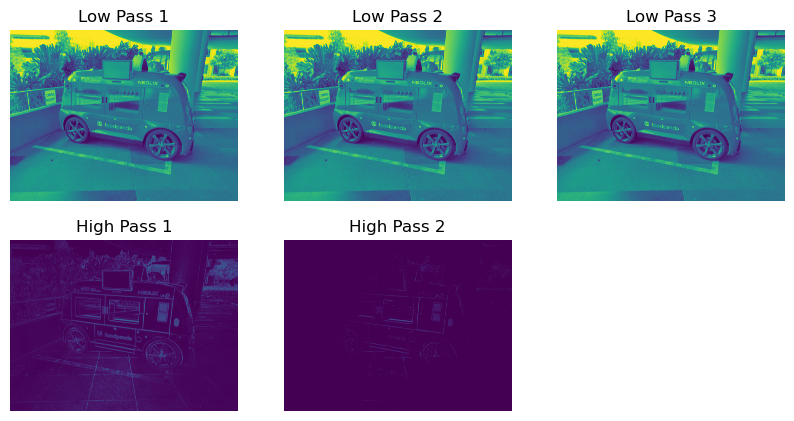

In [23]:
# filtering
plt.figure(figsize=(10, 5))
imgs=[]
for i in range(len(k_name)):
    imgs.append(cv2.filter2D(src=gle, ddepth=-1, kernel=kernels[i]))
plt.subplot(231), plt.imshow(imgs[0]), plt.title('Low Pass 1'), plt.axis('off') 
plt.subplot(232), plt.imshow(imgs[1]), plt.title('Low Pass 2') , plt.axis('off')
plt.subplot(233), plt.imshow(imgs[2]), plt.title('Low Pass 3'), plt.axis('off')
plt.subplot(234), plt.imshow(imgs[3]), plt.title('High Pass 1'), plt.axis('off')
plt.subplot(235), plt.imshow(imgs[4]), plt.title('High Pass 2'), plt.axis('off')


### Sobel Operator
Develop a Sobel edge detection program and test it on images below.

- In this section, you should define the sobel kernel to extract vertical and horizontal features.
- Set a threshold to extract clearer feature
- After you obtain the x and y axis features, try to combine them together

In [24]:
y_sobel_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
x_sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

In [25]:
Y_feature = cv2.filter2D(src=gle, ddepth=-1, kernel=y_sobel_kernel)
X_feature = cv2.filter2D(src=gle, ddepth=-1, kernel=x_sobel_kernel)

(<Axes: >,
 (-0.5, 3999.5, 2999.5, -0.5))

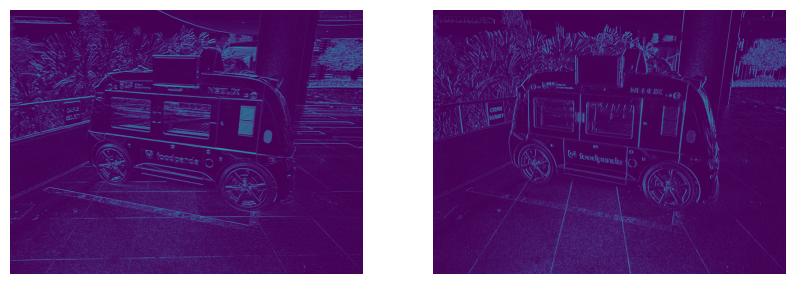

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(Y_feature), plt.axis('off') 
plt.subplot(122), plt.imshow(X_feature) , plt.axis('off')

How can we get the unified version (vertical and horizontal feature in one image)?

In [29]:
thr=0.3
thr_Y=Y_feature.max()*thr
mask_Y=(Y_feature>thr_Y)
thr_X=X_feature.max()*thr
mask_X=(X_feature>thr_X)

Y_feature_thr=Y_feature.copy()*mask_Y
X_feature_thr=X_feature.copy()*mask_X


(<Axes: >,
 (-0.5, 3999.5, 2999.5, -0.5))

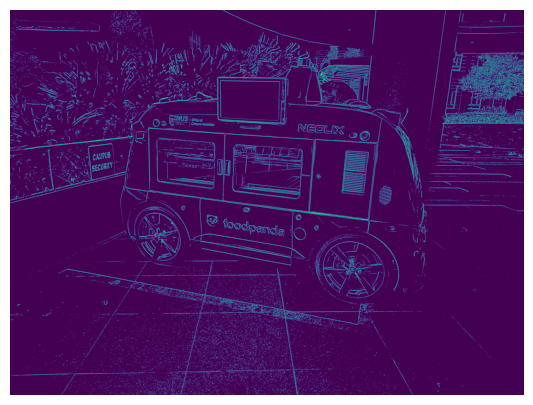

In [30]:
unified_feature=(Y_feature_thr+X_feature_thr)/2
plt.figure(figsize=(10, 5))
plt.subplot(111), plt.imshow(unified_feature), plt.axis('off') 


### Gaussian

Define your gaussian kernel and apply to the image. Note that you should define gaussian kernel by yourself instead of using existing package.
2D Gaussian equation:




$$
G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

In [40]:
import math
def gaussian_kernel(size, sigma=1.0):
    """Generate a Gaussian kernel of given size and standard deviation."""
    # Initialize an empty size x size array
    kernel = np.zeros((size, size))
    
    # Calculate the center position of the kernel
    center = size // 2
    
    # Loop through each element in the size x size array
    for x in range(0, size):
        for y in range(0, size):
            xx = x - center
            yy = y - center
            kernel[x][y] = (1 / math.pi / (sigma ** 2)) * math.e ** (- (xx ** 2 + yy ** 2) / (2 * sigma ** 2))
           
    
    # Normalize the kernel by dividing each element by the sum of all elements
   
    return kernel

(<Axes: >,
 (-0.5, 3999.5, 2999.5, -0.5))

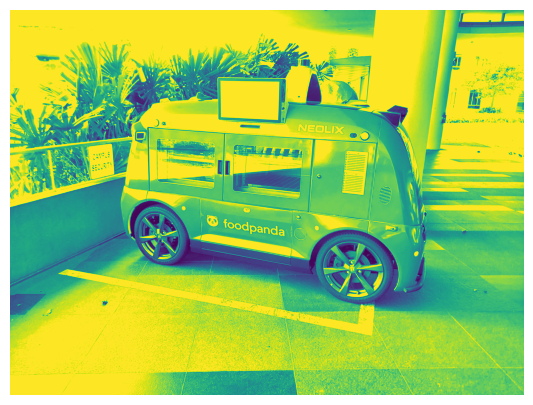

In [41]:

output = cv2.filter2D(src=gle, ddepth=-1, kernel=gaussian_kernel(5, 1))
plt.figure(figsize=(10, 5))
plt.subplot(111), plt.imshow(output), plt.axis('off') 

### Unsharp Masking
Implement unsharp masking by following instruction

(<Axes: >,
 (-0.5, 3999.5, 2999.5, -0.5))

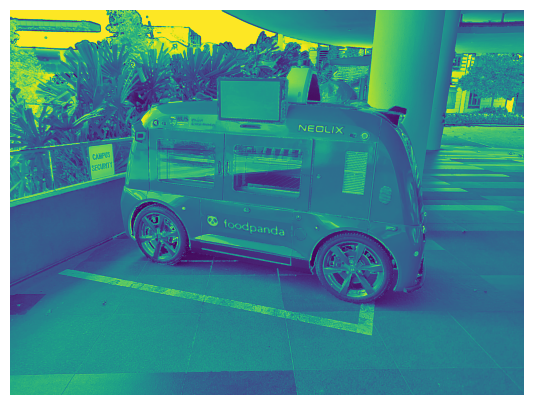

In [45]:
# Step 1: Create a blurred version of the image using Gaussian blur
blurred_image = cv2.GaussianBlur(gle, (21, 21), 0)

# Step 2: Subtract the blurred image from the original to create the mask
mask = gle - blurred_image

# Step 3: Add the mask back to the original image
gle_new = gle + mask


plt.figure(figsize=(10, 5))
plt.subplot(111), plt.imshow(gle_new), plt.axis('off')

